In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.font_manager as fm 
import seaborn as sns

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

os.chdir(r"C:\Users\82109\project\2021 빅데이터 경진대회")

In [2]:
pump = pd.read_csv('펌프_선박엔진.csv')

In [78]:
gong = pd.read_csv('공작기계_선박엔진.csv')

In [79]:
gong['COMPANY_NAME'].value_counts()

CO-295    9979200
Name: COMPANY_NAME, dtype: int64

In [80]:
gong['facility_name'].value_counts()

KBV_1호기    1864800
KBV_2호기    1864800
보명보링기      1864800
선반1        1562400
수직선반       1562400
선반3        1260000
Name: facility_name, dtype: int64

In [94]:
gong = gong.groupby(["facility_name","역률평균_LABEL"]).size().unstack()

In [95]:
gong

역률평균_LABEL,경고,정상,주의
facility_name,,,
KBV_1호기,116445.0,13300.0,1735055.0
KBV_2호기,504560.0,1090565.0,269675.0
보명보링기,1864275.0,105.0,420.0
선반1,1560895.0,NaN,1505.0
선반3,1260000.0,NaN,NaN
수직선반,1090775.0,35.0,471590.0


In [81]:
gong[gong['facility_name']=='KBV_1호기']['역률평균_LABEL'].value_counts()

주의    1735055
경고     116445
정상      13300
Name: 역률평균_LABEL, dtype: int64

In [83]:
고 = pd.DataFrame(gong[gong['facility_name']=='KBV_1호기']['역률평균_LABEL'].value_counts())

In [84]:
고

,역률평균_LABEL
주의,1735055
경고,116445
정상,13300


In [85]:
고['KBV_2호기'] = pump[pump['facility_name']=='KBV_2호기']['역률평균_LABEL'].value_counts()

In [86]:
고['보명보링기'] = pump[pump['facility_name']=='보명보링기']['역률평균_LABEL'].value_counts()

In [87]:
고['선반1'] = pump[pump['facility_name']=='선반1']['역률평균_LABEL'].value_counts()

In [88]:
고['수직선반'] = pump[pump['facility_name']=='수직선반']['역률평균_LABEL'].value_counts()

In [89]:
고['선반3'] = pump[pump['facility_name']=='선반3']['역률평균_LABEL'].value_counts()

In [90]:
고.columns = ['KBV_1호기','KBV_2호기','보명보링기', '선반1', '수직선반', '선반3']

In [97]:
gong=gong.T

In [98]:
gong=gong.loc[['정상','주의','경고']]

In [99]:
gong

facility_name,KBV_1호기,KBV_2호기,보명보링기,선반1,선반3,수직선반
역률평균_LABEL,,,,,,
정상,13300.0,1090565.0,105.0,NaN,NaN,35.0
주의,1735055.0,269675.0,420.0,1505.0,NaN,471590.0
경고,116445.0,504560.0,1864275.0,1560895.0,1260000.0,1090775.0


(array([0, 1, 2]), [Text(0, 0, '정상'), Text(1, 0, '경고'), Text(2, 0, '주의')])

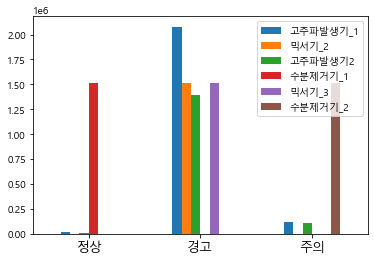

In [52]:
고.plot(kind = 'bar')
plt.xticks(rotation = 0, fontsize = 13)

In [102]:
gong = gong.T

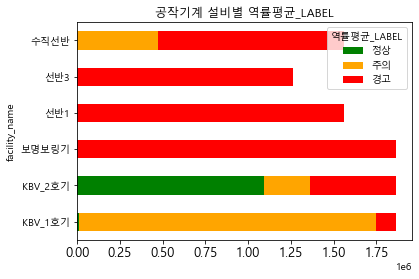

In [104]:
gong.plot(kind='barh', stacked=True, color =['green','orange','red'])
plt.xticks(rotation=0, fontsize=13)
plt.title('공작기계 설비별 역률평균_LABEL')
plt.show()